Se importa las bibliotecas de Pandas y Numpy para la manipulación del set de datos

In [1]:
# importa las bibliotecas Pandas y Numpy

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

Cargamos el set de datos con la función de pandas read_csv('file_path'), en esta ocasión, vamos a utilizar un set de datos de casas con sus características como cantidad de piezas, baños, tamaño del living, de la casa y del sotano, etc y su precio.

In [2]:
ubicacion = "./input/kc_house_data1.csv"
df = pd.read_csv(ubicacion)

Leemos las primeras 10 filas del dataframe y podemos verificar que efectivamente contienen encabezados, por lo que no sera necesario introducir uno. Price es la variable target del set de datos, que se puede predecir según las características que presente el hogar.

In [113]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,NaN,1.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,...,8.0,NaN,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,5,7.237550e+09,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,6,1.321400e+09,20140627T000000,NaN,3.0,2.25,1715.0,6819.0,2.0,0.0,...,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,7,2.008000e+09,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,...,7.0,1060.0,0.0,1963.0,0.0,98198.0,NaN,-122.315,1650.0,9711.0
8,8,2.414600e+09,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,...,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,9,3.793500e+09,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,...,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


Se obtiene información acerca del set de datos, utilizando la funcion info() de pandas, al ejecutarlo, podemos observar que la gran mayoria de las columnas son del tipo numero float64 o int64, siendo la excepción la columna date que es la fecha y esta representada como object.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21221 non-null  float64
 2   date           21163 non-null  object 
 3   price          21157 non-null  float64
 4   bedrooms       21157 non-null  float64
 5   bathrooms      21149 non-null  float64
 6   sqft_living    21147 non-null  float64
 7   sqft_lot       21196 non-null  float64
 8   floors         21145 non-null  float64
 9   waterfront     21149 non-null  float64
 10  view           21139 non-null  float64
 11  condition      21152 non-null  float64
 12  grade          21183 non-null  float64
 13  sqft_above     21154 non-null  float64
 14  sqft_basement  21140 non-null  float64
 15  yr_built       21170 non-null  float64
 16  yr_renovated   21193 non-null  float64
 17  zipcode        21182 non-null  float64
 18  lat   

Se verifica los datos nulos del set de datos y podemos observar que 23 columnas presentan valores faltante, entre ellos la mas importante que es la columna price, vamos a realizar una manipulación de datos para rellenar los datos faltantes y sacar columnas innecesarias o filas que tengan faltante la variable precio.

In [115]:
print ('Datos Faltantes:')
df.isnull().sum()

Datos Faltantes:


Unnamed: 0         0
id               392
date             450
price            456
bedrooms         456
bathrooms        464
sqft_living      466
sqft_lot         417
floors           468
waterfront       464
view             474
condition        461
grade            430
sqft_above       459
sqft_basement    473
yr_built         443
yr_renovated     420
zipcode          431
lat              443
long             443
sqft_living15    468
sqft_lot15       436
dtype: int64

In [116]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.122100e+04,2.115700e+04,21157.000000,21149.000000,21147.000000,2.119600e+04,21145.000000,21149.000000,21139.000000,...,21183.000000,21154.000000,21140.000000,21170.000000,21193.000000,21182.000000,21170.000000,21170.000000,21145.000000,21177.000000
mean,10806.00000,4.583391e+09,5.402048e+05,3.371319,2.115384,2081.155247,1.512034e+04,1.494254,0.007613,0.233739,...,7.655478,1789.276402,291.704352,1971.020501,84.097202,98077.966670,47.559859,-122.213942,1985.611681,12703.722718
std,6239.28002,2.875465e+09,3.652878e+05,0.932008,0.771108,920.862243,4.153470e+04,0.539670,0.086920,0.764988,...,1.176311,829.280873,442.951083,29.364879,400.984659,53.525944,0.138660,0.140789,685.314116,26687.376276
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.124079e+09,3.220000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904980e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069850e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677975,-122.125000,2360.000000,10080.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Manipulación de Datos
Vamos a Eliminar las columnas innecesarias, como el unnamed: 0, id y zipcode y eliminar las filas que contengan datos faltante en la columna precio, ya que es la variable objetiva y no podemos rellenar los datos faltantes con aproximaciones ya que podría afectar en la predicción y gráficos.
También, vamos a eliminar las filas que falten datos tanto en la latitud como en la longitud para mapas.

In [3]:
df.drop(columns=['Unnamed: 0','date', 'zipcode', 'id'], inplace=True)

df.dropna(subset=["price"], axis=0, inplace=True)
df.dropna(subset=["lat", "long"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,NaN,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,NaN,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,47.6561,-122.005,4760.0,101930.0
6,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,47.5123,-122.337,1780.0,8113.0
7,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,47.3684,-122.031,2390.0,7570.0
8,662500.0,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965.0,0.0,47.6007,-122.145,2210.0,8925.0
9,468000.0,2.0,1.00,1160.0,6000.0,1.0,0.0,0.0,4.0,7.0,860.0,300.0,1942.0,0.0,47.6900,-122.292,1330.0,6000.0


Para las columnas waterfront y view, que corresponden a casas que están en el borde del rio o agua y que tengan buena vista respectivamente, tienen valores binarios para representar si lo tienen o no. Para los datos faltantes, vamos a reemplazarlos con la mediana de cada uno.

In [4]:
print('Mediana columna waterfront:'+ str(df['waterfront'].value_counts().idxmax()))
print('Mediana columna view:'+ str(df['view'].value_counts().idxmax()))

#El valor que se repite en ambas es 0, por lo tanto, vamos a reemplazar los datos faltantes de estas columnas con 0

df["waterfront"].replace(np.nan, 0, inplace=True)
df["view"].replace(np.nan, 0, inplace=True)


Mediana columna waterfront:0.0
Mediana columna view:0.0


C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\3827042038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["waterfront"].replace(np.nan, 0, inplace=True)
C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\3827042038.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Para las columnas bedrooms, bathrooms, floors, grade y conditions vamos a utilizar el numero que mas se repita (la mediana) para reemplazar los datos faltantes

In [5]:
print('Mediana columna bedrooms:'+ str(df['bedrooms'].value_counts().idxmax()))
print('Mediana columna bathrooms:'+ str(df['bathrooms'].value_counts().idxmax()))
print('Mediana columna floors:'+ str(df['floors'].value_counts().idxmax()))
print('Mediana columna grade:'+ str(df['grade'].value_counts().idxmax()))
print('Mediana columna condition:'+ str(df['condition'].value_counts().idxmax()))

#Los valores que se repiten en las columnas bedrooms, bathrooms, floors, grade y condition  son 3, 2.5, 1, 7 y 3 respectivamente, vamos a reemplazar los datos faltantes por estos a cada columna
df["bedrooms"].replace(np.nan, 3, inplace=True)
df["bathrooms"].replace(np.nan, 2.5, inplace=True)
df["floors"].replace(np.nan, 1, inplace=True)
df["grade"].replace(np.nan, 7, inplace=True)
df["condition"].replace(np.nan, 3, inplace=True)


Mediana columna bedrooms:3.0
Mediana columna bathrooms:2.5
Mediana columna floors:1.0
Mediana columna grade:7.0
Mediana columna condition:3.0


C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\2196100878.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].replace(np.nan, 3, inplace=True)
C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\2196100878.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Para las columnas sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15 y sqft_lot15, vamos a reemplazar sus datos faltantes por el promedio de cada uno.

In [6]:
sqft_living_mean =df['sqft_living'].mean(axis=0)
sqft_lot_mean =df['sqft_lot'].mean(axis=0)
sqft_above_mean =df['sqft_above'].mean(axis=0)
sqft_basement_mean =df['sqft_basement'].mean(axis=0)
sqft_living15_mean =df['sqft_living15'].mean(axis=0)
sqft_lot15_mean =df['sqft_lot15'].mean(axis=0)

df["sqft_living"].replace(np.nan, sqft_living_mean, inplace=True)
df["sqft_lot"].replace(np.nan, sqft_lot_mean, inplace=True)
df["sqft_above"].replace(np.nan, sqft_above_mean, inplace=True)
df["sqft_basement"].replace(np.nan, sqft_basement_mean, inplace=True)
df["sqft_living15"].replace(np.nan, sqft_living15_mean, inplace=True)
df["sqft_lot15"].replace(np.nan, sqft_lot15_mean, inplace=True)


C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\2642296672.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sqft_living"].replace(np.nan, sqft_living_mean, inplace=True)
C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\2642296672.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

Para las columnas yr_built y yr_renovated, vamos a reemplazar sus datos faltantes por la mediana

In [7]:
print('Mediana columna yr_built:'+ str(df['yr_built'].value_counts().idxmax()))
print('Mediana columna yr_renovated:'+ str(df['yr_renovated'].value_counts().idxmax()))

#El valor que se repite es 2014 para yr_build y 0 para yr_renovated


df["yr_built"].replace(np.nan, 2014, inplace=True)
df["yr_renovated"].replace(np.nan, 0, inplace=True)


Mediana columna yr_built:2014.0
Mediana columna yr_renovated:0.0


C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\1917102421.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_built"].replace(np.nan, 2014, inplace=True)
C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\1917102421.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Generalización de datos
Las columnas que empiezan con sqft_ son las medidas del hogar, tanto del sotano, techo o living, vamos a transformarlos a m2 utilizando la siguiente formula: __m2 = sqft/10.764__

In [8]:
df["m2_living"] = df["sqft_living"]/10.764
df["m2_lot"] = df["sqft_lot"]/10.764
df["m2_above"] = df["sqft_above"]/10.764
df["m2_basement"] = df["sqft_basement"]/10.764
df["m2_living15"] = df["sqft_living15"]/10.764
df["m2_lot15"] = df["sqft_lot15"]/10.764

df.drop(columns=['sqft_lot15', 'sqft_living15', 'sqft_basement', 'sqft_above', 'sqft_lot', 'sqft_living'], inplace=True)

df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
0,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1955.0,0.0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808
1,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1951.0,1991.0,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416
2,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,6.0,1933.0,0.0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075
3,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,7.0,1965.0,0.0,47.5208,-122.393,182.088443,1399.917230,97.547380,84.541063,126.347083,464.511334
4,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,8.0,1987.0,0.0,47.6168,-122.045,156.075808,750.650316,165.985956,0.000000,167.224080,697.045708
5,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,11.0,2001.0,0.0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056
6,229500.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1960.0,0.0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091
7,323000.0,3.0,2.50,2.0,0.0,0.0,3.0,7.0,2003.0,0.0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160
8,662500.0,3.0,2.50,1.0,0.0,0.0,3.0,8.0,1965.0,0.0,47.6007,-122.145,330.732070,910.070606,172.798216,157.933854,205.314010,829.152731
9,468000.0,2.0,1.00,1.0,0.0,0.0,4.0,7.0,1942.0,0.0,47.6900,-122.292,107.766630,557.413601,79.895949,27.870680,123.560015,557.413601


## Normalización de Datos
Vamos a normalizar datos los datos de grade, donde vamos a dividir las notas de las casas (grade) con respecto a la nota maxima, en este caso es 13. Vamos a utilizar la función max para obtener el máximo de nota y dividir todos los datos de la columna por este máximo.

In [9]:
df['grade'] = df['grade']/df['grade'].max()
df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
0,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,0.538462,1955.0,0.0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808
1,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,0.538462,1951.0,1991.0,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416
2,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,0.461538,1933.0,0.0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075
3,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,0.538462,1965.0,0.0,47.5208,-122.393,182.088443,1399.917230,97.547380,84.541063,126.347083,464.511334
4,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,0.615385,1987.0,0.0,47.6168,-122.045,156.075808,750.650316,165.985956,0.000000,167.224080,697.045708
5,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,0.846154,2001.0,0.0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056
6,229500.0,3.0,1.00,1.0,0.0,0.0,3.0,0.538462,1960.0,0.0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091
7,323000.0,3.0,2.50,2.0,0.0,0.0,3.0,0.538462,2003.0,0.0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160
8,662500.0,3.0,2.50,1.0,0.0,0.0,3.0,0.615385,1965.0,0.0,47.6007,-122.145,330.732070,910.070606,172.798216,157.933854,205.314010,829.152731
9,468000.0,2.0,1.00,1.0,0.0,0.0,4.0,0.538462,1942.0,0.0,47.6900,-122.292,107.766630,557.413601,79.895949,27.870680,123.560015,557.413601


## Agrupar Datos
Agruparemos la columna condition, que indica de manera numérica la condición de la casa, mientras mas alto, mejor es la condición de la casa.
Transformamos la columna de float a int:

In [10]:
df["condition"]=df["condition"].astype(int, copy=True)
df["yr_built"]=df["yr_built"].astype(int, copy=True)
df["yr_renovated"]=df["yr_renovated"].astype(int, copy=True)


Creamos una lista con 4 elementos del mínimo de la condición (1) y el máximo (5), y otra lista con strings, donde contengan las etiquetas correspondientes a la condición que tenga la casa:
- Si la condición esta evaluada entre 1 a 2.3, entonces tendrá una etiqueta "Mala" indicando que la condición de la casa es mala
- Si la condición esta evaluada entre 2.3 y 3.7, entonces tendrá una etiqueta "OK", indicando que la condición de la casa es mediocre
- Si la condición esta evaluada entre 3.7 y 5, entonces tendrá una etiqueta de "Buena", indicando que la condición de la casa es buena.
Se realiza la modificación a la columna con la funcion pd.cut con las etiquetas mencionada anteriormente.

In [11]:
condition_lin = np.linspace(min(df["condition"]), max(df["condition"]), 4)
name_condition_lin = ['Mala', 'Ok', 'Buena']
df['condition'] = pd.cut(df['condition'], condition_lin, labels=name_condition_lin, include_lowest=True )
df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
0,221900.0,3.0,1.00,1.0,0.0,0.0,Ok,0.538462,1955,0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808
1,538000.0,3.0,2.25,2.0,0.0,0.0,Ok,0.538462,1951,1991,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416
2,180000.0,2.0,1.00,1.0,0.0,0.0,Ok,0.461538,1933,0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075
3,604000.0,4.0,3.00,1.0,0.0,0.0,Buena,0.538462,1965,0,47.5208,-122.393,182.088443,1399.917230,97.547380,84.541063,126.347083,464.511334
4,510000.0,3.0,2.00,1.0,0.0,0.0,Ok,0.615385,1987,0,47.6168,-122.045,156.075808,750.650316,165.985956,0.000000,167.224080,697.045708
5,1225000.0,4.0,4.50,1.0,0.0,0.0,Ok,0.846154,2001,0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056
6,229500.0,3.0,1.00,1.0,0.0,0.0,Ok,0.538462,1960,0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091
7,323000.0,3.0,2.50,2.0,0.0,0.0,Ok,0.538462,2003,0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160
8,662500.0,3.0,2.50,1.0,0.0,0.0,Ok,0.615385,1965,0,47.6007,-122.145,330.732070,910.070606,172.798216,157.933854,205.314010,829.152731
9,468000.0,2.0,1.00,1.0,0.0,0.0,Buena,0.538462,1942,0,47.6900,-122.292,107.766630,557.413601,79.895949,27.870680,123.560015,557.413601


## Almacenamiento del set de datos manipulado
Se utilizara la funcion de .to_csv para almacenar el set de datos manipulados en un csv, se almacenara en la carpeta output

In [12]:
df.to_csv('output/kc_house_data_modified.csv')

---
## Generar graficos

In [13]:
%matplotlib inline
df.index.name = None
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
0,221900.0,3.0,1.00,1.0,0.0,0.0,Ok,0.538462,1955,0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808
1,538000.0,3.0,2.25,2.0,0.0,0.0,Ok,0.538462,1951,1991,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416
2,180000.0,2.0,1.00,1.0,0.0,0.0,Ok,0.461538,1933,0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075
3,604000.0,4.0,3.00,1.0,0.0,0.0,Buena,0.538462,1965,0,47.5208,-122.393,182.088443,1399.917230,97.547380,84.541063,126.347083,464.511334
4,510000.0,3.0,2.00,1.0,0.0,0.0,Ok,0.615385,1987,0,47.6168,-122.045,156.075808,750.650316,165.985956,0.000000,167.224080,697.045708


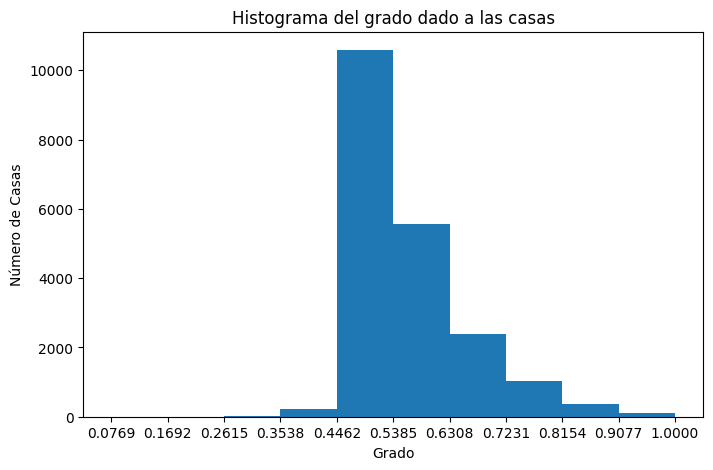

In [14]:
contador_nota, bordes_nota = np.histogram(df['grade'])
df['grade'].plot(kind='hist', figsize=(8, 5),  xticks=bordes_nota)
# Agregar un título al histograma
plt.title('Histograma del grado dado a las casas')
# Agregar etiqueta al eje y
plt.ylabel('Número de Casas')
# Agregar etiqueta al eje x
plt.xlabel('Grado')

plt.show()


Gráfico de Línea

In [38]:
test = df[['yr_built', 'price']].groupby("yr_built")
avg_price= test.mean("price")
avg_price.rename(columns={"price": "Precio"}, inplace=True)
avg_price.head(15)

,Precio
yr_built,
1900,591496.087500
1901,566825.680000
1902,686591.666667
1903,478884.697674
1904,595901.350000
1905,753481.926471
1906,655994.451220
1907,682128.683333
1908,555789.962963


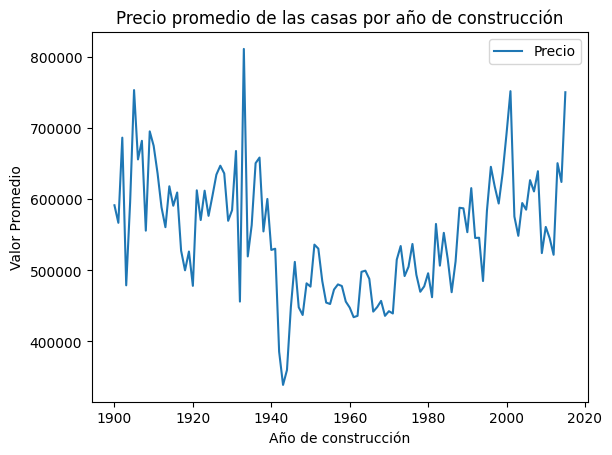

In [40]:
avg_price.plot()
# Agregar un título al histograma
plt.title('Precio promedio de las casas por año de construcción')
# Agregar etiqueta al eje y
plt.ylabel('Valor Promedio')
# Agregar etiqueta al eje x
plt.xlabel('Año de construcción')
plt.show()

Gráfico circular

In [43]:
test = df[['condition', 'grade']].groupby("condition")
avg_grade= test.mean("grade")
avg_grade.rename(columns={"grade": "grado_avg"}, inplace=True)
avg_grade.head(15)

C:\Users\pc0121\AppData\Local\Temp\ipykernel_4128\775466821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test = df[['condition', 'grade']].groupby("condition")


,grado_avg
condition,
Mala,0.494272
Ok,0.599838
Buena,0.566108


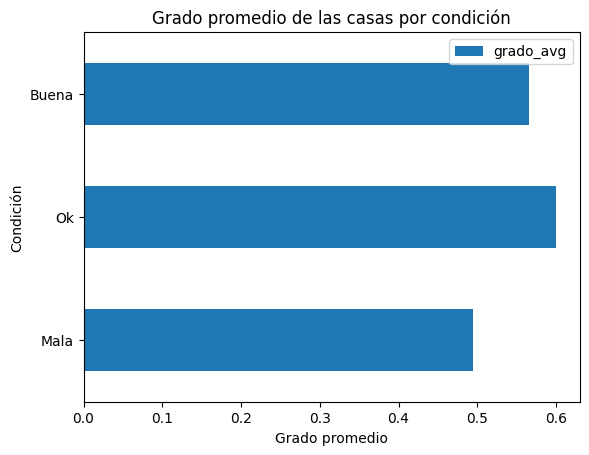

In [49]:
avg_grade.plot(kind = 'barh')
plt.title('Grado promedio de las casas por condición')
# Agregar etiqueta al eje y
plt.ylabel('Condición')
# Agregar etiqueta al eje x
plt.xlabel('Grado promedio')

plt.show()